In [ ]:
print("Harsh Rawte")

Harsh Rawte


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
# Define the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes (softmax for multi-class classification)
    layers.Dense(10, activation='softmax')
])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3395 - loss: 1.7847 - val_accuracy: 0.5545 - val_loss: 1.2478
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5691 - loss: 1.2139 - val_accuracy: 0.6024 - val_loss: 1.1175
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6321 - loss: 1.0426 - val_accuracy: 0.6216 - val_loss: 1.0734
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6675 - loss: 0.9387 - val_accuracy: 0.6722 - val_loss: 0.9485
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7029 - loss: 0.8545 - val_accuracy: 0.6899 - val_loss: 0.8945
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7208 - loss: 0.7944 - val_accuracy: 0.6990 - val_loss: 0.8730
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7392 - loss: 0.7389 - val_accuracy: 0.7083 - val_loss: 0.8422
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7582 - loss: 0.69

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.7041 - loss: 0.8799
Test accuracy: 0.7041000127792358


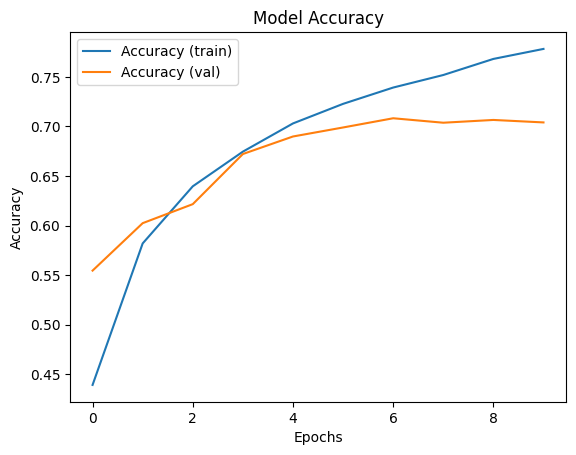

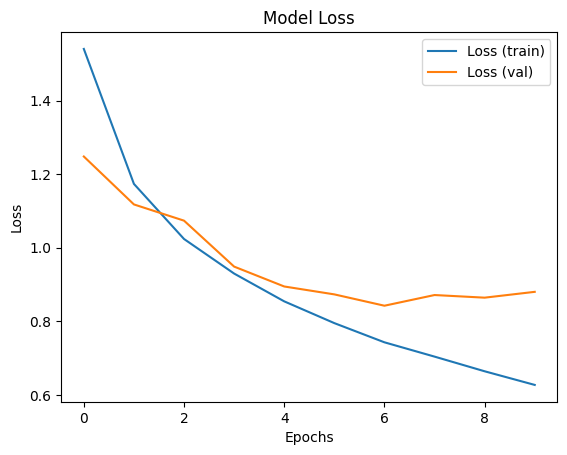

In [ ]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


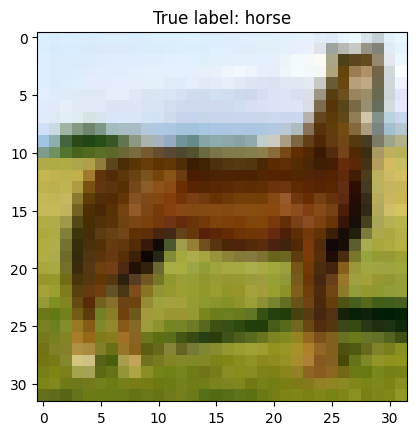

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted label: horse
Correct prediction!


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a random test image from CIFAR-10
random_index = np.random.randint(0, x_test.shape[0])
image = x_test[random_index]
true_label = y_test[random_index]

# Display the image
plt.imshow(image)
plt.title(f"True label: {class_names[np.argmax(true_label)]}")
plt.show()

# Predict the class of the image
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_label = model.predict(image)
predicted_class = class_names[np.argmax(predicted_label)]

print(f"Predicted label: {predicted_class}")

# Check if the prediction is correct
if np.argmax(true_label) == np.argmax(predicted_label):
    print("Correct prediction!")
else:
    print("Incorrect prediction.")


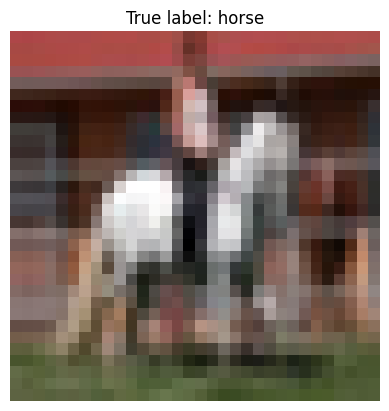

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label: horse
Correct prediction!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a random test image from CIFAR-10
random_index = np.random.randint(0, x_test.shape[0])
image = x_test[random_index]
true_label = y_test[random_index]

# Display the image with correct scaling
plt.imshow(image)
plt.title(f"True label: {class_names[np.argmax(true_label)]}")
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Predict the class of the image
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_label = model.predict(image)
predicted_class = class_names[np.argmax(predicted_label)]

print(f"Predicted label: {predicted_class}")

# Check if the prediction is correct
if np.argmax(true_label) == np.argmax(predicted_label):
    print("Correct prediction!")
else:
    print("Incorrect prediction.")


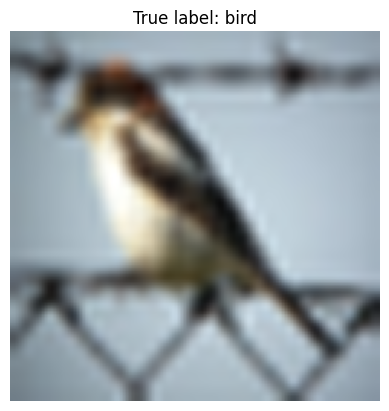

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted label: bird
Correct prediction!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Pick a random test image from CIFAR-10
random_index = np.random.randint(0, x_test.shape[0])
image = x_test[random_index]
true_label = y_test[random_index]

# Resize the image to a higher resolution (e.g., 128x128) for better visualization
upscaled_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_CUBIC)

# Display the upscaled image
plt.imshow(upscaled_image)
plt.title(f"True label: {class_names[np.argmax(true_label)]}")
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Predict the class of the image
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_label = model.predict(image)
predicted_class = class_names[np.argmax(predicted_label)]

print(f"Predicted label: {predicted_class}")

# Check if the prediction is correct
if np.argmax(true_label) == np.argmax(predicted_label):
    print("Correct prediction!")
else:
    print("Incorrect prediction.")


FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


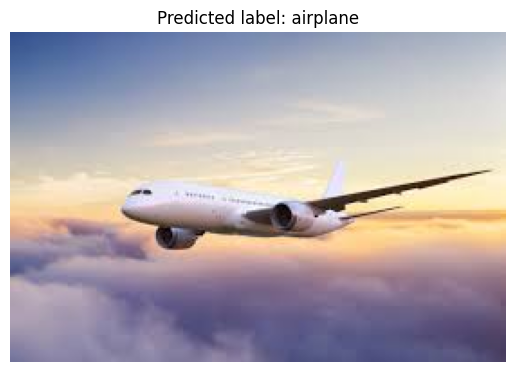

Predicted label: airplane


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from IPython.display import display
from ipywidgets import FileUpload
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Define CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to handle file upload and prediction
def upload_and_predict(model):
    # Create file upload widget
    upload_widget = FileUpload(accept='image/*', multiple=False)

    display(upload_widget)  # Display the upload widget

    def on_upload_change(change):
        # Get the uploaded file's content
        uploaded_file = next(iter(upload_widget.value.values()))
        img_data = uploaded_file['content']

        # Convert the binary data into a PIL image
        img = image.load_img(BytesIO(img_data), target_size=(32, 32))  # CIFAR-10 images are 32x32
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize the image

        # Predict the class of the image
        predicted_label = model.predict(img_array)
        predicted_class = class_names[np.argmax(predicted_label)]

        # Display the uploaded image
        uploaded_img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_COLOR)
        uploaded_img = cv2.cvtColor(uploaded_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.imshow(uploaded_img)
        plt.title(f"Predicted label: {predicted_class}")
        plt.axis('off')  # Hide axes for better visualization
        plt.show()

        # Print the prediction
        print(f"Predicted label: {predicted_class}")

    # Observe the file upload and call the handler function
    upload_widget.observe(on_upload_change, names='value')

# Run the function to upload and predict
upload_and_predict(model)

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


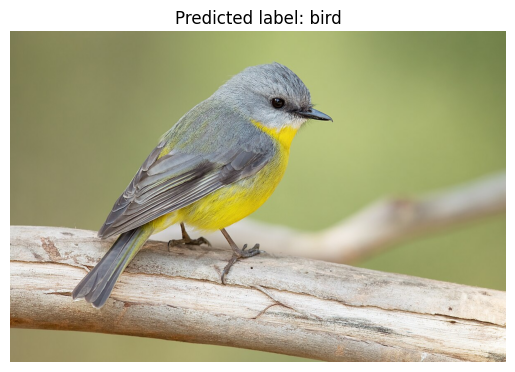

Predicted label: bird


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from IPython.display import display
from ipywidgets import FileUpload
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Define CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to handle file upload and prediction
def upload_and_predict(model):
    # Create file upload widget
    upload_widget = FileUpload(accept='image/*', multiple=False)

    display(upload_widget)  # Display the upload widget

    def on_upload_change(change):
        # Get the uploaded file's content
        uploaded_file = next(iter(upload_widget.value.values()))
        img_data = uploaded_file['content']

        # Convert the binary data into a PIL image
        img = image.load_img(BytesIO(img_data), target_size=(32, 32))  # CIFAR-10 images are 32x32
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize the image

        # Predict the class of the image
        predicted_label = model.predict(img_array)
        predicted_class = class_names[np.argmax(predicted_label)]

        # Display the uploaded image
        uploaded_img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_COLOR)
        uploaded_img = cv2.cvtColor(uploaded_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.imshow(uploaded_img)
        plt.title(f"Predicted label: {predicted_class}")
        plt.axis('off')  # Hide axes for better visualization
        plt.show()

        # Print the prediction
        print(f"Predicted label: {predicted_class}")

    # Observe the file upload and call the handler function
    upload_widget.observe(on_upload_change, names='value')

# Run the function to upload and predict
upload_and_predict(model)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2519 - loss: 2.1255 - val_accuracy: 0.4810 - val_loss: 1.5463
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4518 - loss: 1.6316 - val_accuracy: 0.5155 - val_loss: 1.4743
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4978 - loss: 1.5187 - val_accuracy: 0.5665 - val_loss: 1.3429
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5315 - loss: 1.4410 - val_accuracy: 0.5990 - val_loss: 1.2763
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5556 - loss: 1.3880 - val_accuracy: 0.6063 - val_loss: 1.2365
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5800 - loss: 1.3354 - val_accuracy: 0.6336 - val_loss: 1.1951
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5997 - loss: 1.2951 - val_accuracy: 0.6372 - val_loss: 1.1791
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6118 - loss: 1.2723

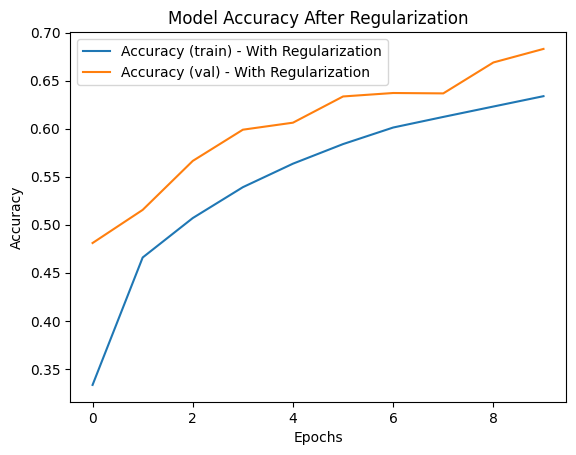

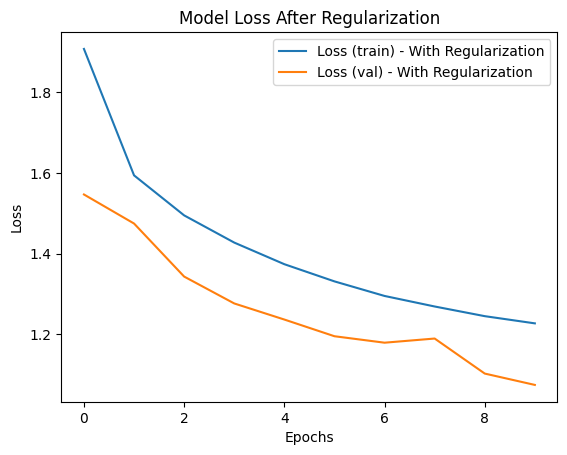

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


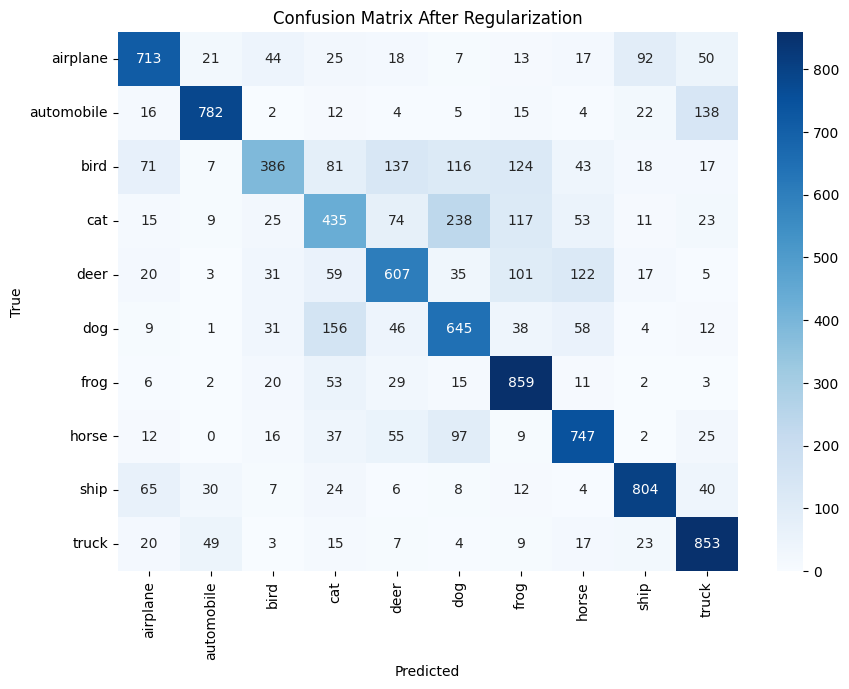

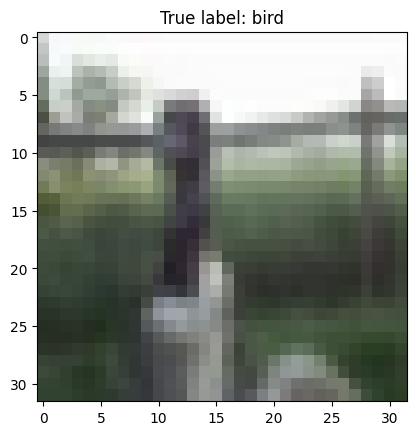

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted label: horse
Incorrect prediction.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3405 - loss: 1.7687 - val_accuracy: 0.5267 - val_loss: 1.3342
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5682 - loss: 1.2174 - val_accuracy: 0.6108 - val_loss: 1.0764
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6277 - loss: 1.0515 - val_accuracy: 0.6442 - val_loss: 1.0081
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6627 - loss: 0.9558 - val_accuracy: 0.6608 - val_loss: 0.9784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6939 - loss: 0.8706 - val_accuracy: 0.6678 - val_loss: 0.9624
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7130 - loss: 0.8149 - val_accuracy: 0.6748 - val_loss: 0.9228
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7300 - loss: 0.7663 - val_accuracy: 0.6834 - val_loss: 0.9341
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7465 - loss: 0.7227

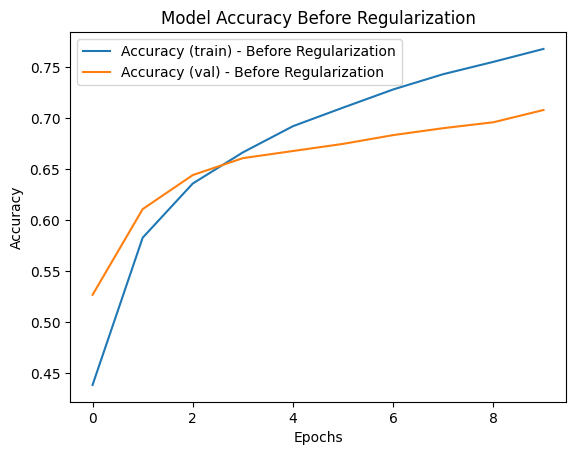

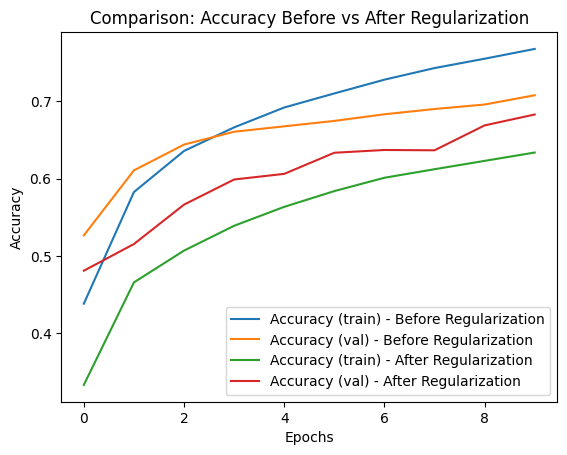

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 2: Define the CNN model with adjusted regularization
model_with_regularization = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),

    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Summarize the model architecture
model_with_regularization.summary()

# Step 3: Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Reduced learning rate

model_with_regularization.compile(optimizer=optimizer,
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 4: Train the model with regularization
history_with_regularization = model_with_regularization.fit(x_train, y_train, epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            callbacks=[early_stopping])

# Step 5: Evaluate the model with regularization
test_loss, test_acc = model_with_regularization.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy with regularization: {test_acc}')

# Step 6: Visualize training history with regularization
plt.plot(history_with_regularization.history['accuracy'], label='Accuracy (train) - With Regularization')
plt.plot(history_with_regularization.history['val_accuracy'], label='Accuracy (val) - With Regularization')
plt.title('Model Accuracy After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_with_regularization.history['loss'], label='Loss (train) - With Regularization')
plt.plot(history_with_regularization.history['val_loss'], label='Loss (val) - With Regularization')
plt.title('Model Loss After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Confusion Matrix

# Get predictions on the test data
y_pred = model_with_regularization.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix After Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Test the model with a random image
# Pick a random test image from CIFAR-10
random_index = np.random.randint(0, x_test.shape[0])
image = x_test[random_index]
true_label = y_test[random_index]

# Display the image
plt.imshow(image)
plt.title(f"True label: {class_names[np.argmax(true_label)]}")
plt.show()

# Predict the class of the image
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_label = model_with_regularization.predict(image)
predicted_class = class_names[np.argmax(predicted_label)]

print(f"Predicted label: {predicted_class}")

# Check if the prediction is correct
if np.argmax(true_label) == np.argmax(predicted_label):
    print("Correct prediction!")
else:
    print("Incorrect prediction.")

# --- BEFORE REGULARIZATION ---
# Model without regularization
model_without_regularization = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model without regularization
model_without_regularization.compile(optimizer='adam',
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

# Train the model without regularization
history_without_regularization = model_without_regularization.fit(x_train, y_train, epochs=10,
                                                                  validation_data=(x_test, y_test))

# Visualize training history before regularization
plt.plot(history_without_regularization.history['accuracy'], label='Accuracy (train) - Before Regularization')
plt.plot(history_without_regularization.history['val_accuracy'], label='Accuracy (val) - Before Regularization')
plt.title('Model Accuracy Before Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# After training, plot the comparison between "before" and "after" regularization
plt.plot(history_without_regularization.history['accuracy'], label='Accuracy (train) - Before Regularization')
plt.plot(history_without_regularization.history['val_accuracy'], label='Accuracy (val) - Before Regularization')
plt.plot(history_with_regularization.history['accuracy'], label='Accuracy (train) - After Regularization')
plt.plot(history_with_regularization.history['val_accuracy'], label='Accuracy (val) - After Regularization')
plt.title('Comparison: Accuracy Before vs After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2520 - loss: 2.0813 - val_accuracy: 0.4747 - val_loss: 1.5315
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4541 - loss: 1.6155 - val_accuracy: 0.5352 - val_loss: 1.3982
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4930 - loss: 1.5228 - val_accuracy: 0.5644 - val_loss: 1.3601
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5233 - loss: 1.4618 - val_accuracy: 0.5819 - val_loss: 1.3055
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5505 - loss: 1.4168 - val_accuracy: 0.6214 - val_loss: 1.2260
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5655 - loss: 1.3760 - val_accuracy: 0.6261 - val_loss: 1.2228
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5774 - loss: 1.3695 - val_accuracy: 0.6341 - val_loss: 1.2078
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5908 - loss: 1.3

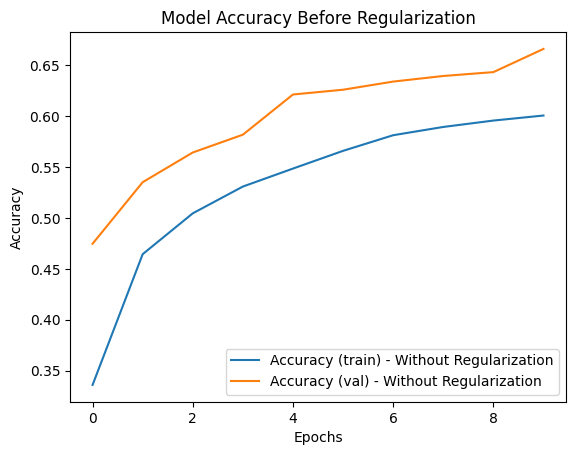

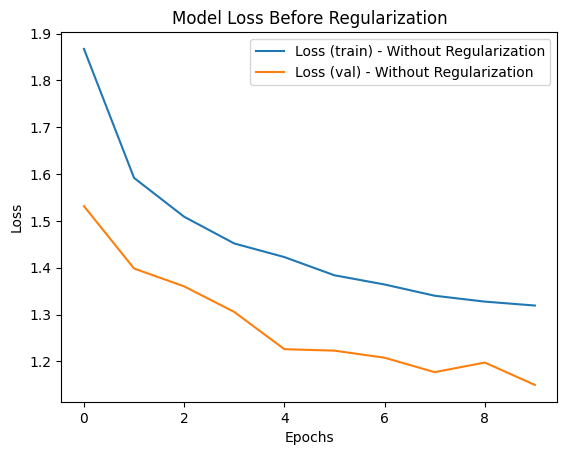

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


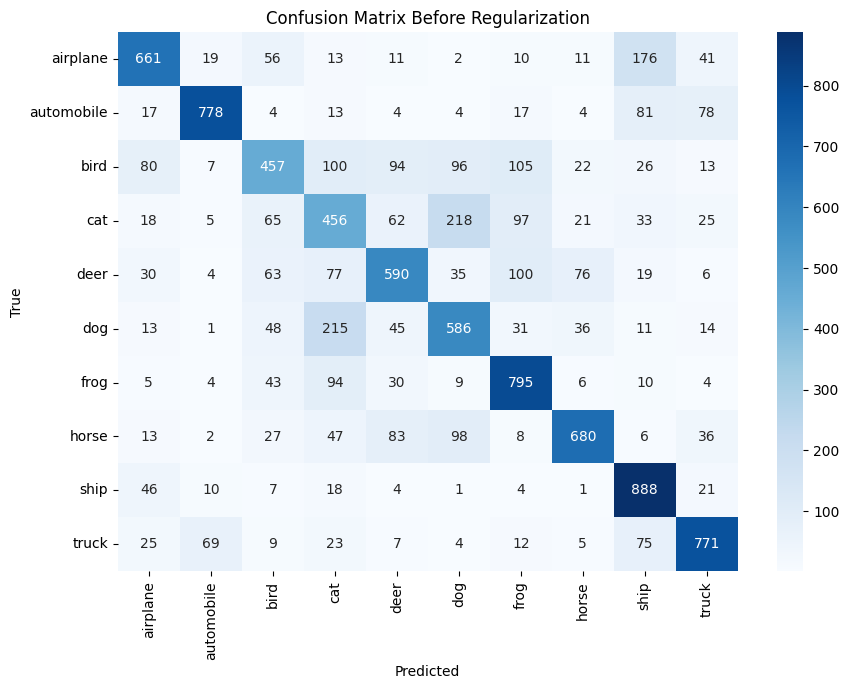

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 2: Define the CNN model with adjusted regularization
model_with_regularization = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)),  # Reduce regularization strength
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Reduce dropout rate

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Reduce dropout rate

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Reduce dropout rate

    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Summarize the model architecture
model_with_regularization.summary()

# Step 3: Compile the model with a slightly higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Slightly higher learning rate

model_with_regularization.compile(optimizer=optimizer,
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 4: Train the model with regularization
history_with_regularization = model_with_regularization.fit(x_train, y_train, epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            callbacks=[early_stopping])

# Step 5: Evaluate the model with regularization
test_loss, test_acc = model_with_regularization.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy with regularization: {test_acc}')

# Step 6: Visualize training history with regularization
plt.plot(history_with_regularization.history['accuracy'], label='Accuracy (train) - Without Regularization')
plt.plot(history_with_regularization.history['val_accuracy'], label='Accuracy (val) - Without Regularization')
plt.title('Model Accuracy Before Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_with_regularization.history['loss'], label='Loss (train) - Without Regularization')
plt.plot(history_with_regularization.history['val_loss'], label='Loss (val) - Without Regularization')
plt.title('Model Loss Before Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Confusion Matrix

# Get predictions on the test data
y_pred = model_with_regularization.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Before Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.2276 - loss: 2.0590 - val_accuracy: 0.4225 - val_loss: 1.5824 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.3806 - loss: 1.6913 - val_accuracy: 0.5052 - val_loss: 1.3642 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4352 - loss: 1.5718 - val_accuracy: 0.5412 - val_loss: 1.3039 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4654 - loss: 1.5065 - val_accuracy: 0.5542 - val_loss: 1.2627 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.4837 - loss: 1.4559 - val_accuracy: 0.5905 - val_loss: 1.1838 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4985 - loss: 1.4354 - val_accuracy: 0.6014 - val_loss: 1.1673 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5132 - loss: 1.4009

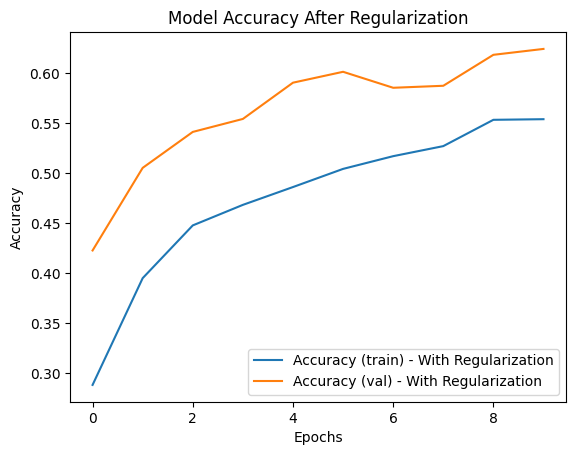

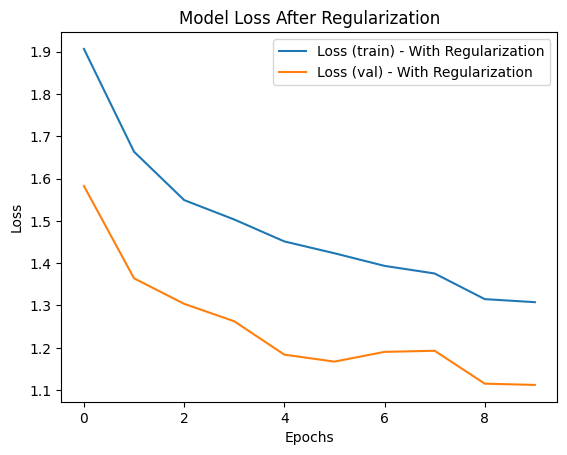

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


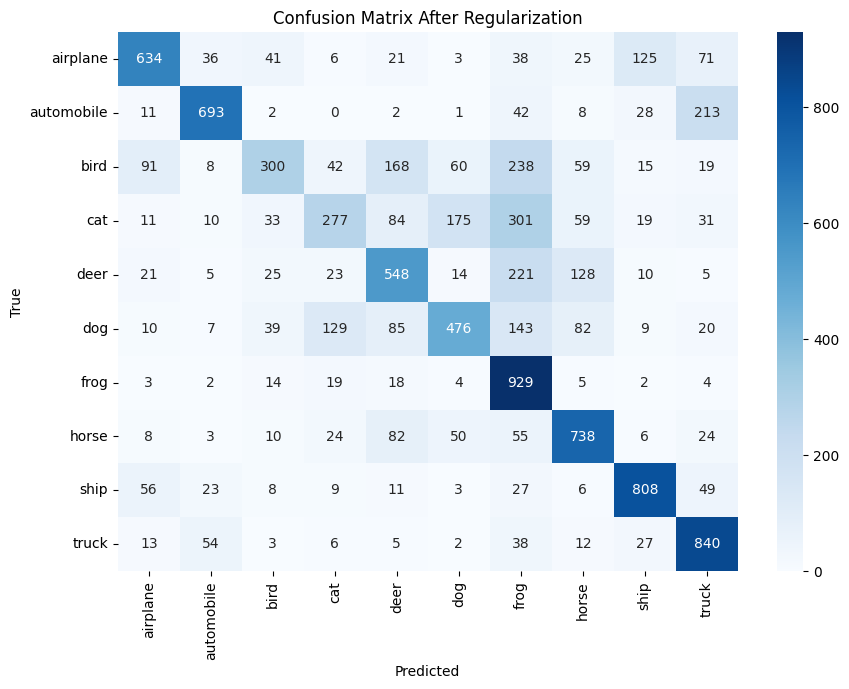

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 2: Define the CNN model with adjusted regularization
model_with_regularization = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.0001)),  # Reduced regularization strength
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Reduced dropout rate

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Reduced dropout rate

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Flatten(),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),  # Reduced dropout rate

    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Summarize the model architecture
model_with_regularization.summary()

# Step 3: Compile the model with a slightly higher learning rate and learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Slightly higher learning rate
model_with_regularization.compile(optimizer=optimizer,
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce the learning rate if the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

# Step 4: Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    horizontal_flip=True,  # Random horizontal flips
)

# Fit the model with data augmentation
history_with_regularization = model_with_regularization.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            callbacks=[early_stopping, reduce_lr])

# Step 5: Evaluate the model with regularization
test_loss, test_acc = model_with_regularization.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy with regularization: {test_acc}')

# Step 6: Visualize training history with regularization
plt.plot(history_with_regularization.history['accuracy'], label='Accuracy (train) - With Regularization')
plt.plot(history_with_regularization.history['val_accuracy'], label='Accuracy (val) - With Regularization')
plt.title('Model Accuracy After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_with_regularization.history['loss'], label='Loss (train) - With Regularization')
plt.plot(history_with_regularization.history['val_loss'], label='Loss (val) - With Regularization')
plt.title('Model Loss After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Confusion Matrix

# Get predictions on the test data
y_pred = model_with_regularization.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix After Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3427 - loss: 1.7674 - val_accuracy: 0.5518 - val_loss: 1.2337
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5738 - loss: 1.2013 - val_accuracy: 0.6035 - val_loss: 1.1320
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6404 - loss: 1.0222 - val_accuracy: 0.6641 - val_loss: 0.9649
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6752 - loss: 0.9150 - val_accuracy: 0.6757 - val_loss: 0.9499
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7042 - loss: 0.8332 - val_accuracy: 0.6894 - val_loss: 0.8959
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7277 - loss: 0.7715 - val_accuracy: 0.6920 - val_loss: 0.9042
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7477 - loss: 0.7158 - val_accuracy: 0.7001 - val_loss: 0.8791
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7587 - loss: 0.680

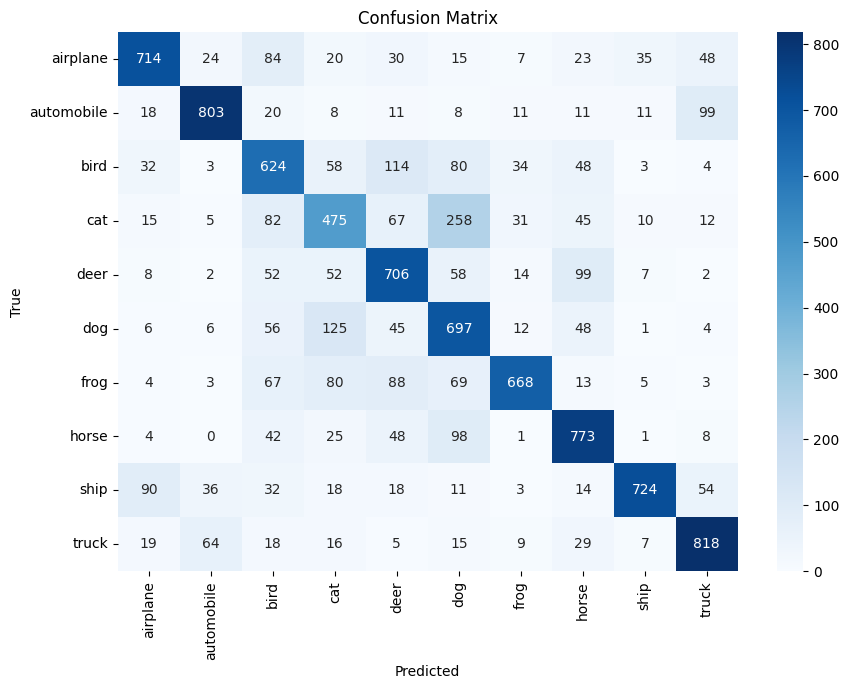

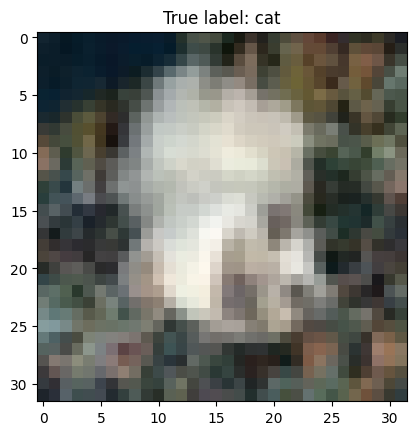

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Predicted label: frog
Incorrect prediction.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 2: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Summarize the model architecture
model.summary()

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Step 6: Confusion Matrix

# Get predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert to class labels

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 7: Test the model with a random image
random_index = np.random.randint(0, x_test.shape[0])
image = x_test[random_index]
true_label = y_test[random_index]

# Display the image
plt.imshow(image)
plt.title(f"True label: {class_names[np.argmax(true_label)]}")
plt.show()

# Predict the class of the image
image = np.expand_dims(image, axis=0)  # Add batch dimension
predicted_label = model.predict(image)
predicted_class = class_names[np.argmax(predicted_label)]

print(f"Predicted label: {predicted_class}")

# Check if the prediction is correct
if np.argmax(true_label) == np.argmax(predicted_label):
    print("Correct prediction!")
else:
    print("Incorrect prediction.")
